In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.linear_model import LinearRegression, Ridge
from sklearn.dummy import DummyRegressor

from sklearn.datasets import load_boston

/Users/NYCMath/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
boston = load_boston()

In [3]:
boston

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [4]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [5]:
boston_df = pd.DataFrame(boston.data, columns=boston.feature_names)

In [6]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [7]:
from sklearn.preprocessing import StandardScaler, MaxAbsScaler

In [8]:
ss_scaler = StandardScaler()
bos_scaled = ss_scaler.fit_transform(boston_df)

In [10]:
bos_scaled = pd.DataFrame(bos_scaled, columns=boston.feature_names)

In [11]:
bos_scaled.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.419782,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562
1,-0.417339,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439
2,-0.417342,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727
3,-0.416750,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517
4,-0.412482,-0.487722,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501


In [12]:
ridge = Ridge()

In [13]:
ridge

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [14]:
ridge.fit(bos_scaled, boston.target)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [16]:
lr = LinearRegression()
lr.fit(boston_df, boston.target)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [35]:
lr_pred = lr.predict(boston_df)
rd_pred = ridge.predict(bos_scaled)

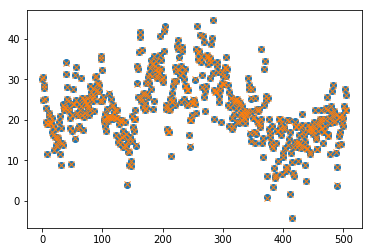

In [36]:
plt.plot(lr_pred, 'o')
plt.plot(rd_pred, 'x')

In [37]:
from sklearn.metrics import mean_squared_error

In [38]:
mean_squared_error(boston.target, lr_pred)

21.894831181729202

In [39]:
mean_squared_error(boston.target, rd_pred)

21.895862166800143

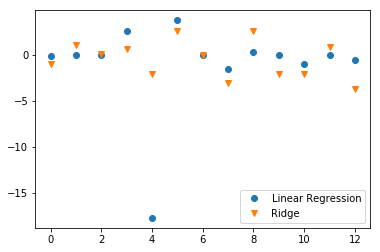

In [40]:
plt.plot(lr.coef_, 'o', label = 'Linear Regression')
plt.plot(ridge.coef_, 'v', label = 'Ridge')
plt.legend()

In [41]:
import seaborn as sns

In [48]:
from sklearn.model_selection import train_test_split

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [62]:
X_train.shape

(379, 3)

In [53]:
X_test.shape

(127, 3)

In [63]:
#here are my alphas that I'll loop through and test
alphas = [0.000001, 0.1, 1.0, 3.0, 10.0, 20.0, 40, 100, 10000]
#creating my input matrix
X = bos_scaled[['RM', 'ZN', 'TAX']]
#assign the thing I'm trying to predict
y = boston.target
#split the data
X_train, X_test, y_train, y_test = train_test_split(X, y)
#loop through alphas list to create a ridge model
#with each alpha, and print mse
for a in alphas:
    #STEP 1: Instantiate the Ridge Model -- Create an empty bucket
    ridge = Ridge(alpha = a)
    #STEP 2: Fit the model
    ridge.fit(X_train, y_train)
    #STEP 3: Make predictions
    preds = ridge.predict(X_test)
    #STEP 4: Evaluate my predictions with Mean Squared Error
    mse = mean_squared_error(y_test, preds)
    #print the results
    print("The MSE for alpha {} is {}".format(a, mse))
    

The MSE for alpha 1e-06 is 47.33080148458638
The MSE for alpha 0.1 is 47.33118930352718
The MSE for alpha 1.0 is 47.33485527655986
The MSE for alpha 3.0 is 47.34411593509699
The MSE for alpha 10.0 is 47.388031975466966
The MSE for alpha 20.0 is 47.47896551617964
The MSE for alpha 40 is 47.743640488041905
The MSE for alpha 100 is 48.97220987958317
The MSE for alpha 10000 is 91.7917614239721


In [64]:
from sklearn.model_selection import cross_val_score

In [70]:
ridge = Ridge()
cross_val_score(ridge, X, y, cv = 5)

array([ 0.55613028,  0.66759444,  0.63752389, -0.23575776, -0.76455921])